In [19]:
from tensorflow.keras.models import Sequential #Сеть прямого распространения
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.utils import plot_model
from keras import models
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел 
import math # Для округления
import os #Для работы с файлами 
from google.colab import drive
from google.colab import files #Для загрузки своей картинки
%matplotlib inline

In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [21]:
test_path = '/content/drive/MyDrive/Bases/IRZ_small_test/' #Папка картинок c Test данными
batch_size = 3 #Размер выборки
img_width  = 120  #Ширина # 480	240	120	60	30	15
img_height = 64   #Высота # 256	128	64	32	16	8

In [22]:
#Генератор изображений
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# обучающая выборка
'''images, labels = next(test_datagen.flow_from_directory(
    test_path, #Путь к папке с тестовыми данными
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    #subset='training' # устанавливаем как набор для обучения
))
'''

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        #color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=batch_size)

filenames = test_generator.filenames
test_len = len(filenames)

print(test_len)

Found 1200 images belonging to 3 classes.
1200


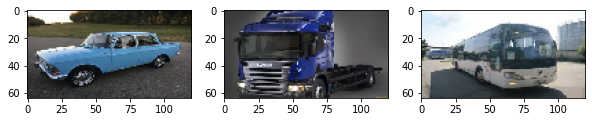

In [24]:
# Взглянем на картинки
fig, axs = plt.subplots(1, 3, figsize=(10, 7)) #Создаем полотно из 3 графиков
sub_folders = os.listdir(test_path)
for i in range(3): #Проходим по всем классам
  single_car_path = test_path + '/' + sub_folders[i] + '/'#Формируем путь к выборке
  img_path = single_car_path + random.choice(os.listdir(single_car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии
plt.show() #Показываем изображения

In [25]:
def createModel2(): 
  model = Sequential()
  
  model.add(Conv2D(256, (4, 4), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2))) # 240x128

  model.add(Conv2D(512, (4, 4), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3))) # 60x32

  model.add(Dropout(0.2))
  
  model.add(Conv2D(1024, (4, 4), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))  # 30x16
  
  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.00007), metrics=['accuracy'])
  return model # Возвращаем созданную сеть

In [26]:
model = createModel2()
model.summary()
#plot_model(model, to_file='/content/drive/MyDrive/Models/model.png')
model.load_weights('/content/drive/MyDrive/Models/Diplom_small_img_200_weights_97-16.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 120, 64, 256)      12544     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 32, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 32, 512)       2097664   
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 10, 512)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 20, 10, 512)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 10, 1024)     

In [28]:
models.save_model(model = model, filepath = '/content/drive/MyDrive/Models/Diplom_model_small_img_97-16.h5', overwrite=True )

In [ ]:
'''
model = models.load_model('/content/drive/MyDrive/Models/Diplom_small_img_200_weights_97-16.h5')
model.summary()
'''

In [29]:
predict = model.predict_generator(test_generator, steps = np.ceil(test_len/batch_size))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [30]:
predict

array([[1.0000000e+00, 1.6202539e-21, 2.4328776e-18],
       [1.0000000e+00, 1.6980391e-19, 3.5263247e-18],
       [1.0000000e+00, 2.5854479e-13, 1.9100576e-14],
       ...,
       [2.3710318e-11, 7.3722063e-11, 1.0000000e+00],
       [3.2467302e-19, 1.3606602e-19, 1.0000000e+00],
       [4.4305243e-06, 9.7874207e-09, 9.9999559e-01]], dtype=float32)

In [32]:
loss, acc = model.evaluate_generator(test_generator, steps=np.ceil(test_len/batch_size), verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


 91/400 [=====>........................] - ETA: 25s - loss: 0.0251 - accuracy: 0.9890

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


400/400 [==============================] - 14s 35ms/step - loss: 0.1299 - accuracy: 0.9733


In [ ]:
'''
видимо среди файлов, есть поврежденные и они не читаются,
попробую их найти, но это не 100% . Всё таки их 1200
'''